In [ ]:
# input values
# 0.40 0.53
# 0.22 0.38
# 0.35 0.32
# 0.26 0.19
# 0.08 0.41
# 0.45 0.30

Choose linkage method for Agglomerative Clustering:
1. Single
2. Complete
3. Average
Enter your choice (1/2/3): 3

Final Clusters:
Cluster 1: [1, 2, 5, 4, 3, 6]

Adjacency Matrix (Euclidean distances):
[[0.   0.23 0.22 0.37 0.34 0.24]
 [0.23 0.   0.14 0.19 0.14 0.24]
 [0.22 0.14 0.   0.16 0.28 0.1 ]
 [0.37 0.19 0.16 0.   0.28 0.22]
 [0.34 0.14 0.28 0.28 0.   0.39]
 [0.24 0.24 0.1  0.22 0.39 0.  ]]


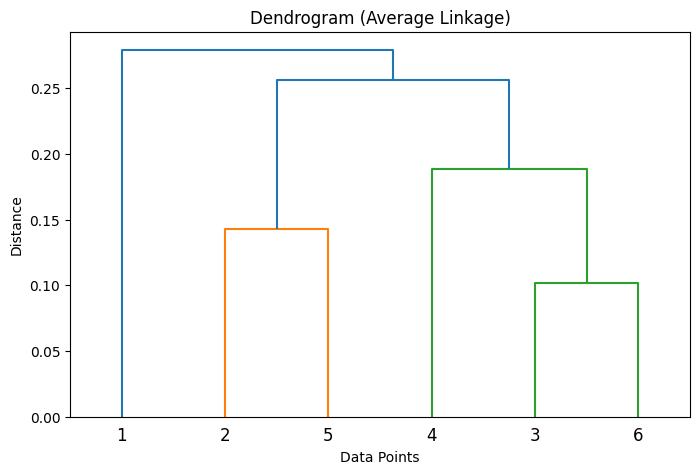

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_user_input():
    print("Enter the number of data points you want to input:")
    while True:
        try:
            n = int(input("Number of data points: ").strip())
            if n < 2:
                print("Please enter at least 2 points.")
                continue
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")
    print("Now enter the coordinates for each point (format: x y):")
    data_points = []
    for i in range(n):
        while True:
            try:
                user_input = input(f"Point {i+1}: ").strip()
                x, y = map(float, user_input.split())
                data_points.append([x, y])
                break
            except ValueError:
                print("Invalid input. Please enter two numeric values separated by a space.")
    return np.array(data_points)


def get_data_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        if 'X' not in df.columns or 'Y' not in df.columns:
            raise ValueError("CSV must contain 'X' and 'Y' columns.")
        return df[['X', 'Y']].to_numpy()
    except Exception as e:
        print(f"Error reading CSV: {e}")
        return None

data = get_data_from_csv('/content/Agglomerative.csv')

if data is None:
    exit("Exiting due to CSV load error.")


# print("Enter the Data for Clustering: \n")
# data = get_user_input()

# Predefined input data
# data = np.array([
#     [0.40, 0.53],
#     [0.22, 0.38],
#     [0.35, 0.32],
#     [0.26, 0.19],
#     [0.08, 0.41],
#     [0.45, 0.30]
# ])

def get_linkage_type():
    print("Choose linkage method for Agglomerative Clustering:")
    print("1. Single")
    print("2. Complete")
    print("3. Average")
    while True:
        choice = input("Enter your choice (1/2/3): ").strip()
        if choice == '1':
            return 'single'
        elif choice == '2':
            return 'complete'
        elif choice == '3':
            return 'average'
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

linkage_method = get_linkage_type()
n_clusters = 1

# Compute Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Distance between two clusters based on linkage method
def cluster_distance(cluster1, cluster2, data, method):
    distances = [euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2]
    if method == 'single':
        return min(distances)
    elif method == 'complete':
        return max(distances)
    elif method == 'average':
        return sum(distances) / len(distances)

# Agglomerative Clustering
def agglomerative_clustering(data, linkage, n_clusters):
    clusters = [[i] for i in range(len(data))]
    history = []

    while len(clusters) > n_clusters:
        min_dist = float('inf')
        to_merge = (0, 1)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j], data, linkage)
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)

        i, j = to_merge
        new_cluster = clusters[i] + clusters[j]
        history.append((clusters[i], clusters[j], min_dist))
        # Remove old clusters and add new one
        clusters = [c for idx, c in enumerate(clusters) if idx not in (i, j)] + [new_cluster]

    return clusters, history

# Create adjacency matrix of current distances
def create_adjacency_matrix(data):
    n = len(data)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean_distance(data[i], data[j])
            matrix[i][j] = matrix[j][i] = dist
    return matrix

# Dendrogram plotting
def plot_dendrogram(history, n_points):
    from scipy.cluster.hierarchy import dendrogram

    # Build linkage matrix
    Z = []
    label_map = {i: i for i in range(n_points)}
    current_label = n_points

    for c1, c2, dist in history:
        i1 = label_map[min(c1)]
        i2 = label_map[min(c2)]
        new_cluster_size = len(c1) + len(c2)
        Z.append([i1, i2, dist, new_cluster_size])
        label_map[min(c1 + c2)] = current_label
        current_label += 1

    Z = np.array(Z)
    plt.figure(figsize=(8, 5))
    dendrogram(Z, labels=[str(i+1) for i in range(n_points)])
    plt.title(f"Dendrogram ({linkage_method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Run clustering
final_clusters, history = agglomerative_clustering(data, linkage_method, n_clusters)

# Print final clusters
print("\nFinal Clusters:")
for idx, cluster in enumerate(final_clusters, 1):
    print(f"Cluster {idx}: {[i+1 for i in cluster]}")

# Print adjacency matrix
adj_matrix = create_adjacency_matrix(data)
print("\nAdjacency Matrix (Euclidean distances):")
print(np.round(adj_matrix, 2))

# Plot dendrogram
plot_dendrogram(history, len(data))
